# Data Processing

Preprocess the GitHub data from [here](https://github.com/dingkaihua/fsrdc-external-census-projects/blob/master/ResearchOutputs.xlsx).

 We chose `pandas` and `dataframes` to process the `xlsx` file due to the library's simple nature when it comes to manipulating (i.e. selecting, renaming, singling-out, etc.) columns of data. We chose `KeyBERT` to produce keywords because of its ability to extract relevant keywords from the provided text using embeddings, which can filter function and irrelevant words more comprehensively than manual filtering.

In [ ]:
import pandas as pd # import pandas for data analysis

file_name = 'ResearchOutputs.xlsx'
sheet_name = 'Sheet1'
expected_columns = ["OutputTitle", "OutputYear", "ProjectRDC"]

try:
  df = pd.read_excel(file_name, sheet_name=sheet_name) # navigate to the file
  missing_columns = [col for col in expected_columns if col not in df.columns]
  if missing_columns: # raises error if these columns are not present
    print(f"Error: Missing required columns: {', '.join(missing_columns)} in '{file_name}' (Sheet: {sheet_name})")
  else:
    rdc_data = df[expected_columns] # only use expected columns, except if not found
    rdc_data = rdc_data.rename(columns={
      "OutputTitle": "title",
      "OutputYear": "year",
      "ProjectRDC": "agency"
    }) # rename columns for my own sake
    rdc_data["year"] = rdc_data["year"].fillna("").astype(str) # add NaN if year is unspecified
    rdc_data["keywords"] = "" # make an empty column for keywords (TBD)
    output_file = "data_extracted.csv" # make an empty csv file
    rdc_data.to_csv(output_file, index=False) # save the selected data into the new csv file

except FileNotFoundError:
  print(f"Error: The file '{file_name}' was not found. Please check the file path.")

except ValueError as e:
  print(f"Error: {e}. Check if the sheet name '{sheet_name}' exists in the file.")

except Exception as e:
  print(f"Unexpected error: {e}")

Prepare the environment for the extraction of keywords.

In [ ]:
!pip install keybert

  Using cached keybert-0.9.0-py3-none-any.whl.metadata (15 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylin

In [ ]:
from keybert import KeyBERT # import keybert for keyword extraction
kw_model = KeyBERT() # initialize the model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Extract keywords using `keyBERT` and add them to the initially empty column `keywords`.

In [ ]:
df2 = pd.read_csv('data_extracted.csv') # read the csv file

df2["title"] = df2["title"].astype(str).fillna("") # make sure all titles are strings + prevent the NaN exception
for index, row in df2.iterrows(): # iterate through each row in the dataframe
  title = row['title'] # get the title of the row from which we can extract keywords
  keywords = kw_model.extract_keywords(title, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=5) # extract top 5 keywords from the title
  formatted_keywords = "; ".join([kw[0] for kw in keywords]) # store the keywords as desired
  print(formatted_keywords)
  df2.loc[index, 'keywords'] = formatted_keywords # update cell

df2["year"] = df2["year"].fillna(0).astype(int).replace(0, "") # makes my year into a number because omg
df2.to_csv("data_with_keywords.csv", index=False)


export; expansion; 1992; boom; 1987
switching; choice; product
plants; productivity; trade; international
firms; export
deaths; manufacturing; plants
manufacturers; prospects; dragon; decade; coming
multinationals; importers; exporters; firms; goods
multinationals; importers; exporters; firms; goods
multinationals; importers; exporters; firms; goods
productivity; firms; costs; trade
plants; productivity; trade; international
productivity; exporting
industries; appalachian; import; liberalization; trade
multinationals; importers; exporters; firms; goods
firms; export
economies; factor; equality; price; states
switching; choice; product
firms; industry; heterogeneous; costs; falling
manufacturing; growth; wage; countries; survival
offshore; industry; work; affects
multinationals; deaths; manufacturing; firm; structure
productivity; manufacturing; wage; stability; plants
consumption; bias; home; input; explaining
export; commodity; destination; flow; survey
bias; home; national; explanati

# Storing Structures

Defining Class `Publications`

We chose to store all data for each publication inside a class for easier retrieval thanks to the dot operators (e.g. `publication.property`). This allowed us to construct more flexible traversal functions, which can then easily be adjusted for the purpose (i.e. only minor adjustments are necessary if one wishes to traverse for different properties such as `year` or `keywords`). All created publication objects are stored in a list titled `publications` for simple traversal.

In [ ]:
class Publication:
  def __init__(self, title, year, agency, keywords):
     self.title = str(title)
     self.year = self.safe_int(year)
     self.agency = str(agency)
     self.keywords = str(keywords)

  def safe_int(self, value):
    try:
        return int(value)
    except ValueError:
        return None

  def __lt__(self, other):
    # sort by title (alphabetically)
    if self.title != other.title:
        return self.title < other.title
    return self.year < other.year

  def __repr__(self):
    # represent publication w title by default
    return f"Publication(title='{self.title}', year={self.year})"

Initialise a `Publication` object for each row and store them in a list titled `publication`.

In [ ]:
publications = []
for index, row in df2.iterrows():
  publication = Publication(row['title'], row['year'], row['agency'], row['keywords'])
  publications.append(publication)

# Graph

Initialise graph with all items from `publications` as nodes.

In [ ]:
import networkx as nx # import library for making graph

G = nx.MultiGraph() # initialise graph, must be multigraph because I need multiple eedges of multiple colours
G.add_nodes_from(publications) # add publications as nodes


Add edges when there is a relation between two publications. In this section, an embedded `for` loop compares every publication with every other publication in the graph and stores `true` if there is similarity. This temporary list of conditions get subsequently passed onto another `for` loop which finally greates an edge of an appropriate colour between these two publications. Add green edges for a relation between titles, red for a relation between years, blue for a relation between agencies, and purple for a relation between keywrods.

In [ ]:
edge_colours = {
    "title": "green",
    "year": "red",
    "agency": "blue",
    "keyword": "purple"
}

for publication in publications:
  for another_publication in publications: # compare every publication with every publication
    if publication is another_publication: # ignore if it's the same publication (doesn't need comparison])
      continue
    conditions = [ # check if title, year, agency or at least one keyword is alike
      (publication.title == another_publication.title, "title"),
      (publication.year == another_publication.year, "year"),
      (publication.agency == another_publication.agency, "agency"),
      (any(keyword in another_publication.keywords for keyword in publication.keywords.split("; ")), "keyword")
    ]

    for condition, colour_label in conditions:
      if condition: # if title, year, agency or at least one keyword is alike, add edge
        G.add_edge(publication, another_publication, colour=edge_colours[colour_label])

**Graph Statistics**

In [ ]:
# return connected components for a subgraph of a particular colour
def count_colored_connected_components(G, colour):
  # get connected nodes given colour
  subgraph = G.edge_subgraph([(u, v, k) for u, v, k, data in G.edges(data=True, keys=True) if data.get("colour") == colour]).copy()

  # include isolated nodes
  for node in G.nodes():
    # make sure that we're not counting None as a separate component (though this is probably useless)
    attribute_name = next((key for key, value in edge_colours.items() if value == colour), None)
    if attribute_name and getattr(node, attribute_name, None) is not None:
      if any(data.get("colour") != colour for _, _, data in G.edges(node, data=True)):
        subgraph.add_node(node)  # add isolated node


  return len(list(nx.connected_components(subgraph)))

In [ ]:
total_nodes = len(G.nodes())
total_edges = len(G.edges())
edges_green = len([(u, v) for u, v, data in G.edges(data=True) if data.get("colour") == "green"])
edges_red = len([(u, v) for u, v, data in G.edges(data=True) if data.get("colour") == "red"])
edges_blue = len([(u, v) for u, v, data in G.edges(data=True) if data.get("colour") == "blue"])
edges_purple = len([(u, v) for u, v, data in G.edges(data=True) if data.get("colour") == "purple"])
number_connected_components_green = count_colored_connected_components(G, "green")
number_connected_components_red = count_colored_connected_components(G, "red")
number_connected_components_blue = count_colored_connected_components(G, "blue")
number_connected_components_purple = count_colored_connected_components(G, "purple")


print(f"Total nodes: {total_nodes}")
print(f"Total edges: {total_edges}")
print(f"Edges with colour 'green': {edges_green}")
print(f"Edges with colour 'red': {edges_red}")
print(f"Edges with colour 'blue': {edges_blue}")
print(f"Edges with colour 'purple': {edges_purple}")
print(f"Number of connected components (green edges): {number_connected_components_green}")
print(f"Number of connected components (red edges): {number_connected_components_red}")
print(f"Number of connected components (blue edges): {number_connected_components_blue}")
print(f"Number of connected components (purple edges): {number_connected_components_purple}")

Total nodes: 1735
Total edges: 1344078
Edges with colour 'green': 2200
Edges with colour 'red': 366888
Edges with colour 'blue': 546488
Edges with colour 'purple': 428502
Number of connected components (green edges): 1326
Number of connected components (red edges): 26
Number of connected components (blue edges): 32
Number of connected components (purple edges): 2


**Plot**

This plot shows all nodes (title and year) and their relation to one another in the overall graph. `selected_colour` determines the graph of what is being depicted for clarity (i.e. year, title, agency, or keyword connection), but the argument can be removed an all graph can be plotted. The overall plot is a bit cluttered as the dataset contains 1735 rows all of which become their individual nodes, and so we only select a pre-defined sample size.

**Connected by Year (Red)**

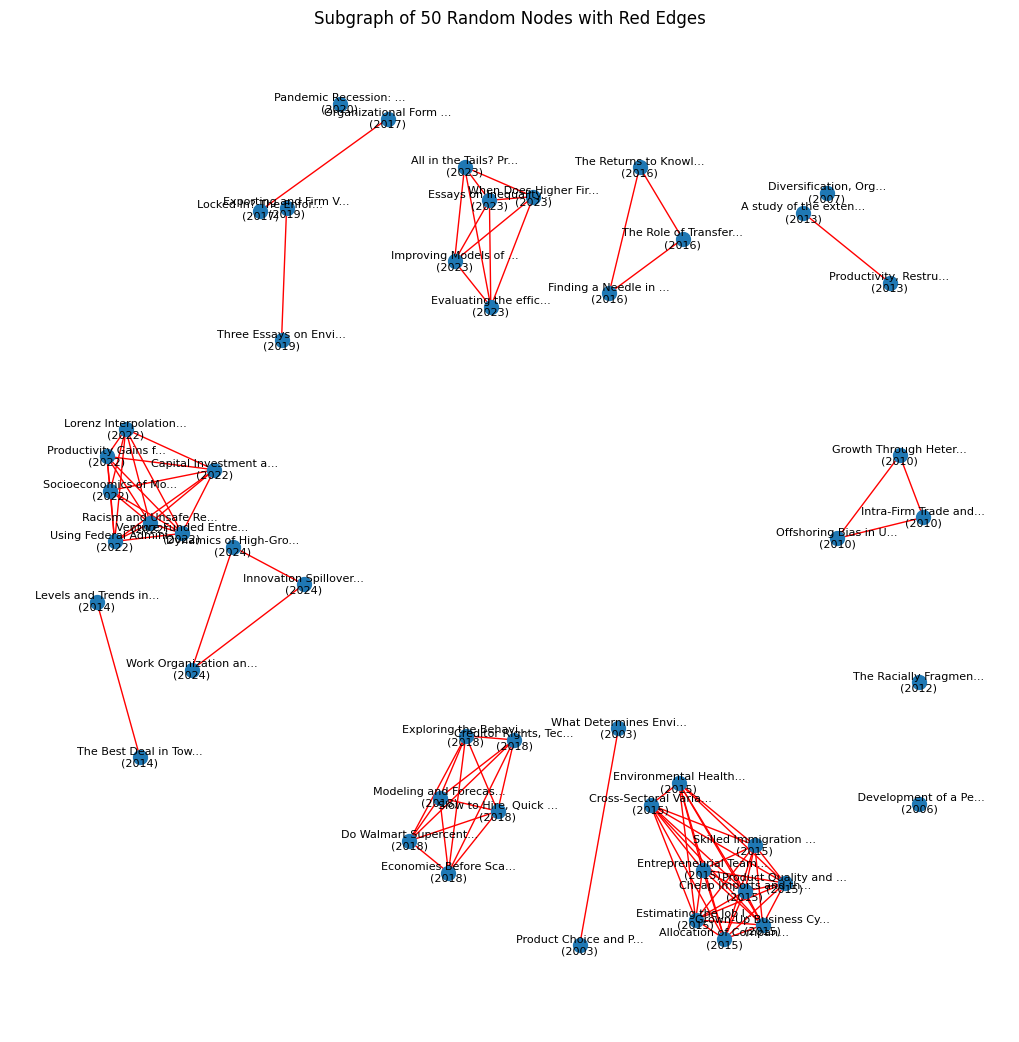

In [ ]:
import matplotlib.pyplot as plt
import random

# sample a fixed number of nodes
sample_size = 50
selected_colour = "red"

# sample random nodes for quick convenient plot
sampled_nodes = random.sample(list(G.nodes()), min(len(G.nodes()), sample_size))

# find all edges between the selected node that have the prespecified colour
filtered_edges = [
  (u, v) for u, v, data in G.edges(data=True)
  if data.get("colour") == selected_colour and u in sampled_nodes and v in sampled_nodes
]

# make a subgraph of these
sampled_subgraph = nx.Graph()
sampled_subgraph.add_nodes_from(sampled_nodes)
sampled_subgraph.add_edges_from(filtered_edges)

# add labels
node_labels = {node: f"{node.title[:20]}...\n({node.year})" for node in sampled_subgraph.nodes()} # cut title to make it prettier

# plot the subgraph
default_node_positions = nx.spring_layout(sampled_subgraph, k=0.5, seed=102)  # generate consistent layout, modify k to individual CCs closer together
plt.figure(figsize=(10, 10))
edge_colors = [G[u][v].get("colour", "black") for u, v in sampled_subgraph.edges()]
nx.draw(
  sampled_subgraph,
  pos=default_node_positions,
  with_labels=True,
  labels=node_labels,
  node_size=100,
  edge_color=selected_colour,
  font_size=8
)
plt.title(f"Subgraph of {sample_size} Random Nodes with {selected_colour.capitalize()} Edges")
plt.show()


**Connected by Title (Green)**

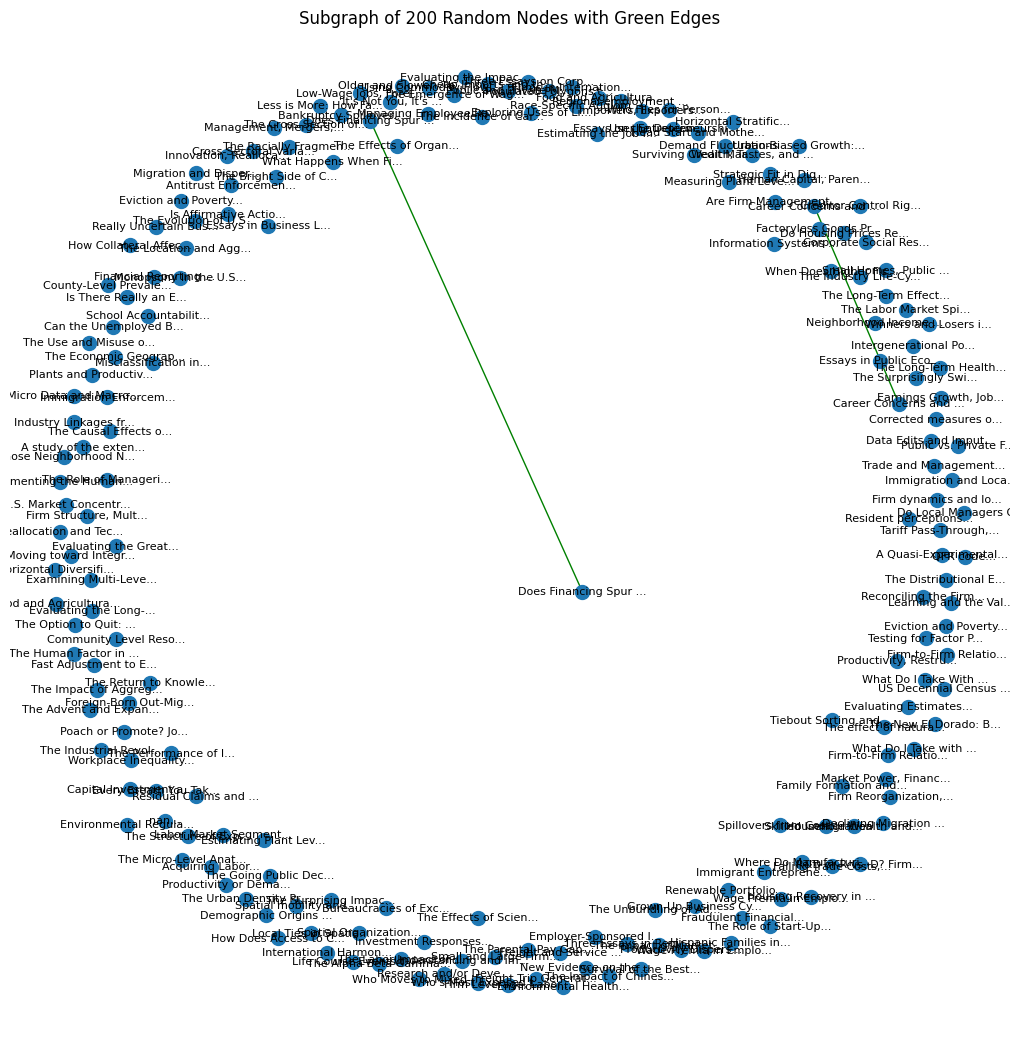

In [ ]:
import matplotlib.pyplot as plt
import random

# sample a fixed number of nodes
sample_size = 200
selected_colour = "green"

# sample random nodes for quick convenient plot
sampled_nodes = random.sample(list(G.nodes()), min(len(G.nodes()), sample_size))

# find all edges between the selected node that have the prespecified colour
filtered_edges = [
  (u, v) for u, v, data in G.edges(data=True)
  if data.get("colour") == selected_colour and u in sampled_nodes and v in sampled_nodes
]

# make a subgraph of these
sampled_subgraph = nx.Graph()
sampled_subgraph.add_nodes_from(sampled_nodes)
sampled_subgraph.add_edges_from(filtered_edges)

# add labels
node_labels = {node: f"{node.title[:20]}..." for node in sampled_subgraph.nodes()} # cut title to make it prettier

# plot the subgraph
default_node_positions = nx.spring_layout(sampled_subgraph, k=0.3, seed=102)  # generate consistent layout, modify k to individual CCs closer together
plt.figure(figsize=(10, 10))
edge_colors = [G[u][v].get("colour", "black") for u, v in sampled_subgraph.edges()]
nx.draw(
  sampled_subgraph,
  pos=default_node_positions,
  with_labels=True,
  labels=node_labels,
  node_size=100,
  edge_color=selected_colour,
  font_size=8
)
plt.title(f"Subgraph of {sample_size} Random Nodes with {selected_colour.capitalize()} Edges")
plt.show()

**Connected by Agency (Blue)**

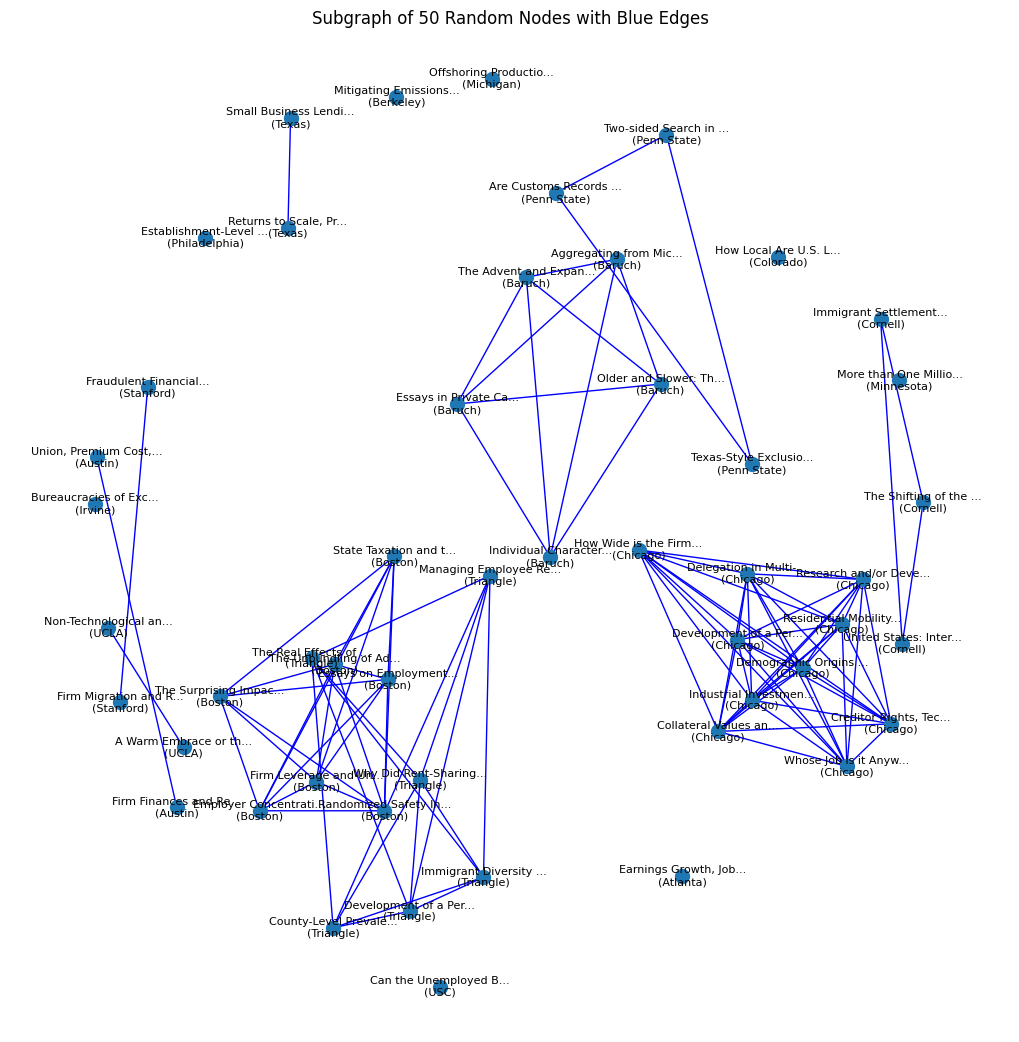

In [ ]:
import matplotlib.pyplot as plt
import random

# sample a fixed number of nodes
sample_size = 50
selected_colour = "blue"

# sample random nodes for quick convenient plot
sampled_nodes = random.sample(list(G.nodes()), min(len(G.nodes()), sample_size))

# find all edges between the selected node that have the prespecified colour
filtered_edges = [
  (u, v) for u, v, data in G.edges(data=True)
  if data.get("colour") == selected_colour and u in sampled_nodes and v in sampled_nodes
]

# make a subgraph of these
sampled_subgraph = nx.Graph()
sampled_subgraph.add_nodes_from(sampled_nodes)
sampled_subgraph.add_edges_from(filtered_edges)

# add labels
node_labels = {node: f"{node.title[:20]}...\n({node.agency})" for node in sampled_subgraph.nodes()} # cut title to make it prettier

# plot the subgraph
default_node_positions = nx.spring_layout(sampled_subgraph, k=0.9, seed=102)  # generate consistent layout, modify k to individual CCs closer together
plt.figure(figsize=(10, 10))
edge_colors = [G[u][v].get("colour", "black") for u, v in sampled_subgraph.edges()]
nx.draw(
  sampled_subgraph,
  pos=default_node_positions,
  with_labels=True,
  labels=node_labels,
  node_size=100,
  edge_color=selected_colour,
  font_size=8
)
plt.title(f"Subgraph of {sample_size} Random Nodes with {selected_colour.capitalize()} Edges")
plt.show()

**Connected by Keyword (Purple)**

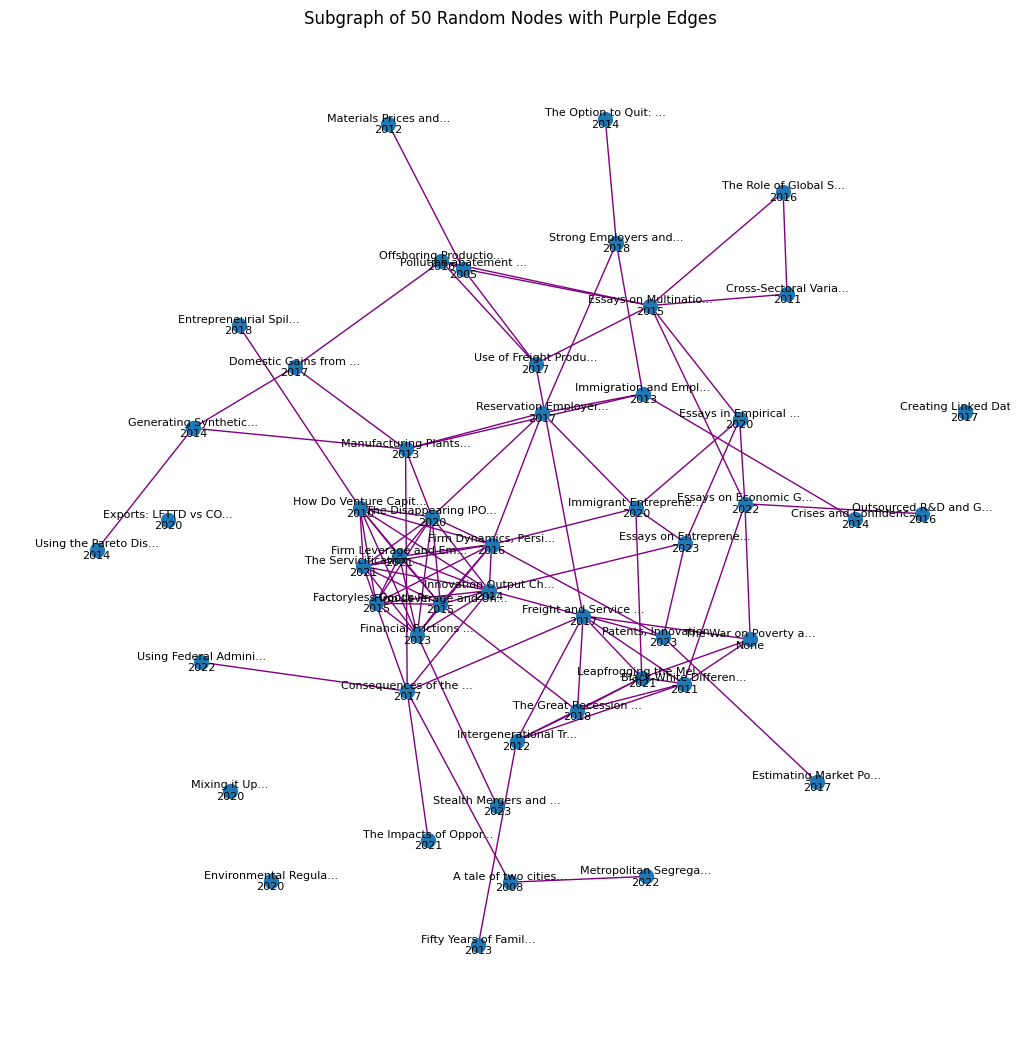

In [ ]:
import matplotlib.pyplot as plt
import random

# sample a fixed number of nodes
sample_size = 50
selected_colour = "purple"

# sample random nodes for quick convenient plot
sampled_nodes = random.sample(list(G.nodes()), min(len(G.nodes()), sample_size))

# find all edges between the selected node that have the prespecified colour
filtered_edges = [
  (u, v) for u, v, data in G.edges(data=True)
  if data.get("colour") == selected_colour and u in sampled_nodes and v in sampled_nodes
]

# make a subgraph of these
sampled_subgraph = nx.Graph()
sampled_subgraph.add_nodes_from(sampled_nodes)
sampled_subgraph.add_edges_from(filtered_edges)

# add labels
node_labels = {node: f"{node.title[:20]}...\n{node.year}" for node in sampled_subgraph.nodes()} # cut title to make it prettier

# plot the subgraph
default_node_positions = nx.spring_layout(sampled_subgraph, k=0.5, seed=102)  # generate consistent layout, modify k to individual CCs closer together
plt.figure(figsize=(10, 10))
edge_colors = [G[u][v].get("colour", "black") for u, v in sampled_subgraph.edges()]
nx.draw(
  sampled_subgraph,
  pos=default_node_positions,
  with_labels=True,
  labels=node_labels,
  node_size=100,
  edge_color=selected_colour,
  font_size=8
)
plt.title(f"Subgraph of {sample_size} Random Nodes with {selected_colour.capitalize()} Edges")
plt.show()

# Search & Traverse

**Breadth-First Search**

Looks through all neighbours first before moving on to the next node.

In [ ]:
from collections import deque

def bfs(graph, start_publication, label):
  # copy dict of keys x colours
  edge_colours = {
      "title": "green",
      "year": "red",
      "agency": "blue",
      "keyword": "purple"
  }

  # only get relevant edges (e.g. when searching for publications related by "year", there is no need to store "agency" etc.)
  select_edges = {(u, v) for u, v, data in graph.edges(data=True) if data.get("colour") == edge_colours[label]}

  # make a new subgraph with only relevant edges
  new_graph = nx.Graph()
  new_graph.add_nodes_from(graph.nodes())  # need all nodes
  new_graph.add_edges_from(select_edges)   # need only selected edges

  # init bfs structures
  visited = set()  # track unique visited nodes
  queue = deque([start_publication])  # bfs queue
  traversal_order = []  # track traversal

  # bfs loop
  while queue:
    current_publication = queue.popleft()
    if current_publication not in visited:
      visited.add(current_publication)
      traversal_order.append(current_publication)

      # add all unvisited neighbours
      for neighbour in sorted(new_graph.neighbors(current_publication)):
        if neighbour not in visited:
          queue.append(neighbour)
  return traversal_order


In [ ]:
lst = [f.title for f in bfs(G, publications[4], "keyword")]
print(lst)

['The Deaths of Manufacturing Plants', 'Industrial Structure and the Sources of Agglomeration Economies: Evidence from Manufacturing Plant Production', 'Plant-Level Productivity and Imputation of Missing Data in the Census of Manufactures', "Evidence of an 'Energy-Management Gap' in U.S. Manufacturing: Spillovers from Firm Management Practices to Energy Efficiency", 'The Life Cycle of Plants in India and Mexico', 'Exports, Borders, Distance, and Plant Size', 'The Spatial Extent of Agglomeration Economies: Evidence from Three U.S. Manufacturing Industries', 'Plants and Productivity in International Trade', 'The Paradox of Progress: The Emergence of Wage Discrimination in U.S. Manufacturing', 'Multiregional Firms and Region Switching in the US Manufacturing Sector', 'New Perspectives on the Decline of U.S. Manufacturing Employment', "The Scope of U.S. 'Factoryless Manufacturing'", 'Productivity, Place, and Plants: Revisiting the Measurement', 'Measuring Plant Level Energy Efficiency and 

**Depth-First Search**

Commits to a neighbour and searches the selected neighbour first before looking at the next neighbour.

In [ ]:
def dfs(graph, start_publication, label):
  # copy dict of keys x colours
  edge_colours = {
      "title": "green",
      "year": "red",
      "agency": "blue",
      "keyword": "purple"
  }

  # only get relevant edges (e.g. when searching for publications related by "year", there is no need to store "agency" etc.)
  select_edges = {(u, v) for u, v, data in graph.edges(data=True) if data.get("colour") == edge_colours[label]}

  # make a new subgraph with only relevant edges
  new_graph = nx.Graph()
  new_graph.add_nodes_from(graph.nodes())  # need all nodes
  new_graph.add_edges_from(select_edges)   # need only selected edges

  visited = set()
  stack = [start_publication]
  traversal_order = []

  while stack:
    current_node = stack.pop()
    if current_node not in visited:
      visited.add(current_node)
      traversal_order.append(current_node)

      neighbors = sorted(new_graph.neighbors(current_node))
      for neighbor in reversed(neighbors):
        if neighbor not in visited:
          stack.append(neighbor)

  return traversal_order

In [ ]:
lst = [f.title for f in dfs(G, publications[1], "keyword")]
print(lst)

['Product Choice and Product Switching', 'Market Factors Influencing the Choice and Generosity of Health Insurance Plans Offered to Employees', 'The Effect of Firm Compensation Structures on Employee Mobility and Employee Entrepreneurship of Extreme Performers', 'Immigrant Entrepreneurship', 'Democratizing Entry: Banking Deregulations, Financing Constraints, and Entrepreneurship', 'Three Essays on Regulation and Entrepreneurship', 'Immigrant Entrepreneurs: New Estimates and a Research Agenda', 'Pioneer Settlement Patterns of U.S. Immigrants: Characteristics of Places and Settlers', 'Accounting for Trade Patterns', 'Firms in International Trade', 'Plants and Productivity in International Trade', 'The Real Effects of Hedge Fund Activism: Productivity, Asset Allocation, and Labor Outcomes', 'The Effects of Productivity and Demand-Specific Factors on Plant Survival and Ownership Change in the U.S. Poultry Industry', 'Productivity Dispersion and Plant Selection in the Ready-Mix Concrete Ind

# Tests

In [ ]:
import unittest

# here I test if the graph builds properly
class TestGraphEdges(unittest.TestCase):

  def test_edge_exists(self):
    self.assertTrue(G.has_edge(publications[0], publications[3]), f"Edge should exist between '{publications[0].title}' and '{publications[3].title}', but it was NOT found.")

  def test_edge_does_not_exist(self):
    self.assertFalse(G.has_edge(publications[94], publications[95]), f"Edge should NOT exist between '{publications[104].title}' and '{publications[105].title}', but it was found.")

  def test_edge_colour(self):
    edges = [attr["colour"] for k, attr in G[publications[6]][publications[7]].items()]
    self.assertIn("green", edges, "No green edge found between these nodes!")

  def test_edge_colour_again(self):
    edges = [attr["colour"] for k, attr in G[publications[980]][publications[1235]].items()]
    self.assertNotIn("red", edges, "No red edge found between these nodes!")

  def test_connected_components_year(self):
    df = pd.read_csv("data_with_keywords.csv")
    self.assertEqual(count_colored_connected_components(G, "red"), df["year"].nunique() + 1, "Connected components incorrect") # +1 for empty

  def test_connected_components_agency(self):
    df = pd.read_csv("data_with_keywords.csv")
    self.assertEqual(count_colored_connected_components(G, "blue"), df["agency"].nunique(), "Connected components incorrect")

# here I test if the search works as expected
class GraphTestBase(unittest.TestCase):
  def setUp(self):
    # make a simple graph to easily test the output
    self.G = nx.Graph()
    self.G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
    self.G.add_edges_from([
        ("A", "B", {"colour": "red"}),
        ("A", "C", {"colour": "red"}),
        ("A", "D", {"colour": "red"}),
        ("B", "E", {"colour": "red"}),
        ("C", "F", {"colour": "blue"}),
        ("D", "G", {"colour": "red"}),
    ])

class TestGraphTraversal(GraphTestBase):
  def test_bfs_traversal(self):
    expected_traversal = ["A", "B", "C", "D", "E", "G"]
    result = bfs(self.G, "A", "year")
    self.assertEqual(result, expected_traversal)

  def test_dfs_traversal(self):
    expected_traversal = ["A", "B", "E", "C", "D", "G"]
    result = dfs(self.G, "A", "year")

if __name__ == '__main__':
  unittest.main(argv=[''], verbosity=2, exit=False)

test_connected_components_agency (__main__.TestGraphEdges.test_connected_components_agency) ... ok
test_connected_components_year (__main__.TestGraphEdges.test_connected_components_year) ... ok
test_edge_colour (__main__.TestGraphEdges.test_edge_colour) ... ok
test_edge_colour_again (__main__.TestGraphEdges.test_edge_colour_again) ... ok
test_edge_does_not_exist (__main__.TestGraphEdges.test_edge_does_not_exist) ... ok
test_edge_exists (__main__.TestGraphEdges.test_edge_exists) ... ok
test_bfs_traversal (__main__.TestGraphTraversal.test_bfs_traversal) ... ok
test_dfs_traversal (__main__.TestGraphTraversal.test_dfs_traversal) ... ok

----------------------------------------------------------------------
Ran 8 tests in 25.365s

OK
